# Mandelbrot Set

Where $c$ is a chosen complex value.

Where $z$ recursively defines a value to be tested, starting with $z_0 = 0.0$.

$$ z_{n+1} = z_n^2 + c $$

If $z$ eventually tends toward infinity for a given $c$ then $c$ **is not an element** in the Mandelbrot set.

If $z$ is bounded for a given $c$ then $c$ **is an element** in the Mandelbrot set.

Let $P^n_c$ be the value of $z$ after $n$ iterations using a chosen value for $c$.

Let $s$ be a maximum for $P$ so that $c$ is in the Mandelbrot set if this is true:

$$ P^n_c \leq s $$

Normally $s \leq 2$. If $z$ exceeds 2, we know [it is not bounded](https://en.wikipedia.org/wiki/Mandelbrot_set).


# In Plain Vanilla Python

In [1]:
def im_mult(a, b):
    return (a[0] * b[0] - a[1] * b[1], a[0] * b[1] + a[1] * b[0])

def im_add(a, b):
    return (a[0] + b[0], a[1] + b[1])

def im_square(a):
    return im_mult(a, a)

def im_radius(a):
    return (a[0] ** 2.0 + a[1] ** 2.0) ** 0.5

def start_z():
    return (0.0, 0.0)

def successor_z(z, c):
    return im_add(im_square(z), c)

def mandelbrot_iterations(s = 2.0, c = (0.0, 0.0), n = 20):
    original_n = n
    z = start_z()
    while n > 0 and im_radius(z) <= s:
        z = successor_z(z, c)
        n -= 1
    return (original_n - n, z)

def map_mbrot_set(start_x = -2.0, start_y = -1.0, end_x = 1.0, end_y = 1.0, resolution_x = 300, resolution_y = 200):
    mbrot_set = []
    max_iterations = 20
    step_x = (end_x - start_x) / float(resolution_x)
    step_y = (end_y - start_y) / float(resolution_y)
    y = start_y
    while y < end_y:
        x = start_x
        row = []
        while x < end_x:
            c = (x, y)
            (n, z) = mandelbrot_iterations(c = c, n = max_iterations)
            row.append(n)
            x += step_x
        mbrot_set.append(row)
        y += step_y
    return mbrot_set



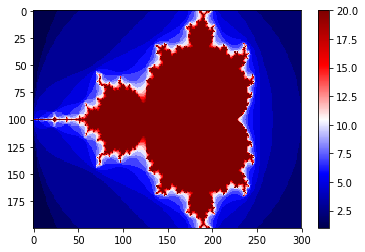

In [2]:
from matplotlib import pyplot
%matplotlib inline

mb_set = map_mbrot_set()
pyplot.imshow(mb_set, cmap="seismic", aspect="auto")
pyplot.colorbar()

# Python and Tensorflow

In [3]:
import tensorflow as tf
sess = tf.Session()

def tf_mbrot_set(x_resolution = 300, y_resolution = 300):
    x_range = tf.lin_space(-2.0, 1.0, x_resolution, 'x_range')
    y_range = tf.lin_space(-1.0, 1.0, y_resolution, 'y_range')
    permutation_real, permutation_cplx = tf.meshgrid(x_range, y_range)
    cplx_range = tf.complex(permutation_real, permutation_cplx, 'cplx_range')

    start_z = tf.complex(0.0, 0.0)

    c = cplx_range
    z = start_z
    n = 20
    s = 2.0

    # Doesn't actually execute, just sequences out ops.
    while n > 0:
        z = z ** 2 + c
        n -= 1

    return tf.minimum(tf.abs(z), 2.0)

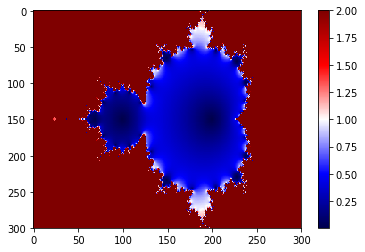

In [4]:
from matplotlib import pyplot
%matplotlib inline

# mb_set = map_mbrot_set()
pyplot.imshow(sess.run(tf_mbrot_set()), cmap="seismic", aspect="auto")
pyplot.colorbar()